## Parameter Configuration

In [1]:
import sys
import numpy as np
import pandas as pd

from fairsearchcore.models import FairScoreDoc
import fairsearchcore as fsc
from codes.alg import FPRank, FSPR_model, best_FPRank
from codes.metrics import evaluate

######################################################################
# Column names
######################################################################

data = 'compas'
prt_attr = 'race'
class_attr = 'h_c'
score_attr = 's'

######################################################################
# Configuration parameters
######################################################################

numBins = 5
bin_width = 0.2
score_norm = 10

filename = 'data/' + data + '_' + prt_attr
output_file = './results/' + data + '_' + prt_attr

## Loading Data

Min acceptability score = 0.1000, Max acceptability score = 1.0000


<AxesSubplot: xlabel='Class'>

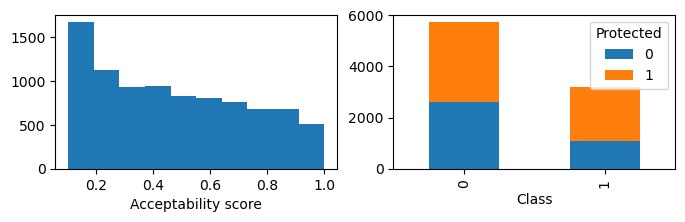

In [2]:
from codes.data_loader import load_data
import matplotlib.pyplot as plt

adj, data, W, s, y, prt = load_data(filename, class_attr, score_attr, prt_attr, score_norm = score_norm)
print('Min acceptability score = {:.4f}, Max acceptability score = {:.4f}'.format(np.min(s), np.max(s)))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,2))
ax1.hist(s)
ax1.set_xlabel('Acceptability score')

df = pd.DataFrame({'Class': y, 'Protected': prt}, dtype='int')
df.groupby(['Class', 'Protected']).size().unstack().plot(ax=ax2, kind='bar', stacked=True)

Total number of nodes = 8946
Number of isolated nodes = 2907


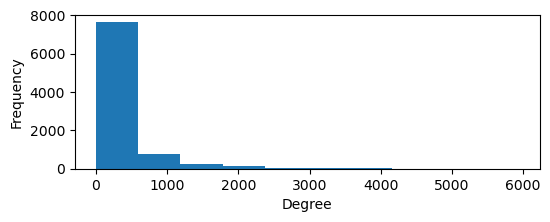

In [3]:
degrees = adj.sum(axis=1)
plt.figure(figsize=(6,2))
plt.hist(degrees)
plt.xlabel('Degree')
plt.ylabel('Frequency')

print('Total number of nodes =', degrees.shape[0])
print('Number of isolated nodes =', sum(degrees==0))

## Results for No Calibration

Results for No Calibration

  prec: 0.491118 |  Rank corr: 1.000000  | fp: 0.587190 | wsd: 0.000007 | wrd: 0.000007


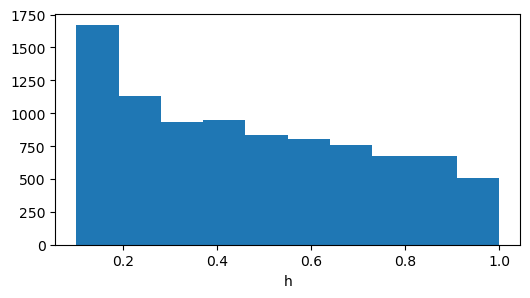

In [4]:
print('Results for No Calibration')
evaluate(s, y, s, prt, W, numBins = numBins, bin_width = bin_width)
out_df = pd.DataFrame({'h': s, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_Nocal.csv', index = False)

## Results for FPRank

In [5]:
results, params  = FPRank(W, s, y, prt, numBins = numBins, bin_width=bin_width)
out_df = pd.DataFrame(results)
out_df.to_csv(output_file + '_FPresults.csv', index=False)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  alpha=0.0100, beta=0.1000: prec=0.5085, corr=0.9933, fp=0.5870, wsd=0.000007, wrd=0.000006
  alpha=0.0100, beta=0.1624: prec=0.5085, corr=0.9933, fp=0.5871, wsd=0.000007, wrd=0.000007
  alpha=0.0100, beta=0.2637: prec=0.5088, corr=0.9931, fp=0.5879, wsd=0.000007, wrd=0.000007
  alpha=0.0100, beta=0.4281: prec=0.5085, corr=0.9933, fp=0.5885, wsd=0.000007, wrd=0.000007
  alpha=0.0100, beta=0.6952: prec=0.5087, corr=0.9931, fp=0.5899, wsd=0.000007, wrd=0.000007
  alpha=0.0100, beta=1.1288: prec=0.5088, corr=0.9931, fp=0.5946, wsd=0.000007, wrd=0.000007
  alpha=0.0100, beta=1.8330: prec=0.5085, corr=0.9931, fp=0.6054, wsd=0.000007, wrd=0.000006
  alpha=0.0100, beta=2.9764: prec=0.5092, corr=0.9920, fp=0.6140, wsd=0.000007, wrd=0.000007
  alpha=0.0100, beta=4.8329: prec=0.5100, corr=0.9896, fp=0.6169, wsd=0.000008, wrd=0.000006
  alpha=0.0100, beta=7.8476: prec=0.5115, corr=0.9849, fp=0.6198, wsd=0.000008, wrd=0.000008
  alpha=0.0100, beta=12.7427: prec=0.5140, corr=0.9693, fp=0.6237, wsd

 10%|████████                                                                        | 1/10 [09:30<1:25:34, 570.54s/it]

  alpha=0.0100, beta=1000.0000: prec=0.4492, corr=0.4638, fp=0.3261, wsd=0.000009, wrd=0.000114
  alpha=0.0278, beta=0.1000: prec=0.5085, corr=0.9933, fp=0.5870, wsd=0.000007, wrd=0.000006
  alpha=0.0278, beta=0.1624: prec=0.5087, corr=0.9931, fp=0.5871, wsd=0.000007, wrd=0.000006
  alpha=0.0278, beta=0.2637: prec=0.5088, corr=0.9931, fp=0.5879, wsd=0.000007, wrd=0.000007
  alpha=0.0278, beta=0.4281: prec=0.5085, corr=0.9933, fp=0.5885, wsd=0.000007, wrd=0.000007
  alpha=0.0278, beta=0.6952: prec=0.5087, corr=0.9931, fp=0.5899, wsd=0.000007, wrd=0.000007
  alpha=0.0278, beta=1.1288: prec=0.5088, corr=0.9931, fp=0.5946, wsd=0.000007, wrd=0.000007
  alpha=0.0278, beta=1.8330: prec=0.5085, corr=0.9931, fp=0.6054, wsd=0.000007, wrd=0.000006
  alpha=0.0278, beta=2.9764: prec=0.5092, corr=0.9920, fp=0.6140, wsd=0.000007, wrd=0.000007
  alpha=0.0278, beta=4.8329: prec=0.5099, corr=0.9896, fp=0.6169, wsd=0.000008, wrd=0.000006
  alpha=0.0278, beta=7.8476: prec=0.5115, corr=0.9849, fp=0.6198, w

 20%|████████████████                                                                | 2/10 [19:37<1:18:54, 591.82s/it]

  alpha=0.0278, beta=1000.0000: prec=0.4494, corr=0.4656, fp=0.3265, wsd=0.000009, wrd=0.000112
  alpha=0.0774, beta=0.1000: prec=0.5087, corr=0.9931, fp=0.5870, wsd=0.000007, wrd=0.000006
  alpha=0.0774, beta=0.1624: prec=0.5087, corr=0.9931, fp=0.5871, wsd=0.000007, wrd=0.000006
  alpha=0.0774, beta=0.2637: prec=0.5088, corr=0.9931, fp=0.5879, wsd=0.000007, wrd=0.000007
  alpha=0.0774, beta=0.4281: prec=0.5087, corr=0.9931, fp=0.5885, wsd=0.000007, wrd=0.000007
  alpha=0.0774, beta=0.6952: prec=0.5085, corr=0.9933, fp=0.5899, wsd=0.000007, wrd=0.000007
  alpha=0.0774, beta=1.1288: prec=0.5088, corr=0.9931, fp=0.5946, wsd=0.000007, wrd=0.000007
  alpha=0.0774, beta=1.8330: prec=0.5085, corr=0.9931, fp=0.6054, wsd=0.000007, wrd=0.000006
  alpha=0.0774, beta=2.9764: prec=0.5091, corr=0.9920, fp=0.6140, wsd=0.000007, wrd=0.000007
  alpha=0.0774, beta=4.8329: prec=0.5100, corr=0.9896, fp=0.6169, wsd=0.000008, wrd=0.000006
  alpha=0.0774, beta=7.8476: prec=0.5115, corr=0.9849, fp=0.6198, w

 30%|████████████████████████                                                        | 3/10 [28:30<1:05:55, 565.08s/it]

  alpha=0.0774, beta=1000.0000: prec=0.4493, corr=0.4653, fp=0.3265, wsd=0.000009, wrd=0.000112
  alpha=0.2154, beta=0.1000: prec=0.5087, corr=0.9931, fp=0.5870, wsd=0.000007, wrd=0.000006
  alpha=0.2154, beta=0.1624: prec=0.5087, corr=0.9931, fp=0.5871, wsd=0.000007, wrd=0.000006
  alpha=0.2154, beta=0.2637: prec=0.5087, corr=0.9931, fp=0.5879, wsd=0.000007, wrd=0.000006
  alpha=0.2154, beta=0.4281: prec=0.5087, corr=0.9931, fp=0.5885, wsd=0.000007, wrd=0.000007
  alpha=0.2154, beta=0.6952: prec=0.5087, corr=0.9931, fp=0.5899, wsd=0.000007, wrd=0.000007
  alpha=0.2154, beta=1.1288: prec=0.5088, corr=0.9931, fp=0.5946, wsd=0.000007, wrd=0.000007
  alpha=0.2154, beta=1.8330: prec=0.5087, corr=0.9928, fp=0.6054, wsd=0.000007, wrd=0.000006
  alpha=0.2154, beta=2.9764: prec=0.5092, corr=0.9920, fp=0.6140, wsd=0.000007, wrd=0.000007
  alpha=0.2154, beta=4.8329: prec=0.5100, corr=0.9896, fp=0.6169, wsd=0.000008, wrd=0.000006
  alpha=0.2154, beta=7.8476: prec=0.5115, corr=0.9849, fp=0.6198, w

 40%|████████████████████████████████▊                                                 | 4/10 [38:18<57:24, 574.03s/it]

  alpha=0.2154, beta=1000.0000: prec=0.4492, corr=0.4635, fp=0.3261, wsd=0.000009, wrd=0.000114
  alpha=0.5995, beta=0.1000: prec=0.5087, corr=0.9931, fp=0.5870, wsd=0.000007, wrd=0.000005
  alpha=0.5995, beta=0.1624: prec=0.5087, corr=0.9931, fp=0.5871, wsd=0.000007, wrd=0.000005
  alpha=0.5995, beta=0.2637: prec=0.5086, corr=0.9933, fp=0.5879, wsd=0.000007, wrd=0.000006
  alpha=0.5995, beta=0.4281: prec=0.5087, corr=0.9931, fp=0.5885, wsd=0.000007, wrd=0.000006
  alpha=0.5995, beta=0.6952: prec=0.5087, corr=0.9931, fp=0.5899, wsd=0.000007, wrd=0.000007
  alpha=0.5995, beta=1.1288: prec=0.5087, corr=0.9931, fp=0.5946, wsd=0.000007, wrd=0.000007
  alpha=0.5995, beta=1.8330: prec=0.5085, corr=0.9931, fp=0.6054, wsd=0.000007, wrd=0.000006
  alpha=0.5995, beta=2.9764: prec=0.5090, corr=0.9922, fp=0.6140, wsd=0.000007, wrd=0.000007
  alpha=0.5995, beta=4.8329: prec=0.5100, corr=0.9896, fp=0.6169, wsd=0.000008, wrd=0.000006
  alpha=0.5995, beta=7.8476: prec=0.5115, corr=0.9849, fp=0.6198, w

 50%|█████████████████████████████████████████                                         | 5/10 [48:08<48:19, 579.97s/it]

  alpha=0.5995, beta=1000.0000: prec=0.4491, corr=0.4632, fp=0.3261, wsd=0.000009, wrd=0.000115
  alpha=1.6681, beta=0.1000: prec=0.5086, corr=0.9931, fp=0.5870, wsd=0.000007, wrd=0.000003
  alpha=1.6681, beta=0.1624: prec=0.5086, corr=0.9931, fp=0.5872, wsd=0.000007, wrd=0.000004
  alpha=1.6681, beta=0.2637: prec=0.5087, corr=0.9931, fp=0.5879, wsd=0.000007, wrd=0.000004
  alpha=1.6681, beta=0.4281: prec=0.5087, corr=0.9931, fp=0.5885, wsd=0.000007, wrd=0.000005
  alpha=1.6681, beta=0.6952: prec=0.5087, corr=0.9931, fp=0.5899, wsd=0.000007, wrd=0.000006
  alpha=1.6681, beta=1.1288: prec=0.5087, corr=0.9931, fp=0.5946, wsd=0.000007, wrd=0.000006
  alpha=1.6681, beta=1.8330: prec=0.5087, corr=0.9928, fp=0.6054, wsd=0.000007, wrd=0.000006
  alpha=1.6681, beta=2.9764: prec=0.5091, corr=0.9920, fp=0.6140, wsd=0.000007, wrd=0.000007
  alpha=1.6681, beta=4.8329: prec=0.5099, corr=0.9896, fp=0.6169, wsd=0.000008, wrd=0.000006
  alpha=1.6681, beta=7.8476: prec=0.5115, corr=0.9849, fp=0.6198, w

 60%|████████████████████████████████████████████████                                | 6/10 [1:00:22<42:09, 632.38s/it]

  alpha=1.6681, beta=1000.0000: prec=0.4491, corr=0.4632, fp=0.3261, wsd=0.000009, wrd=0.000115
  alpha=4.6416, beta=0.1000: prec=0.5087, corr=0.9931, fp=0.5871, wsd=0.000007, wrd=0.000003
  alpha=4.6416, beta=0.1624: prec=0.5087, corr=0.9931, fp=0.5872, wsd=0.000007, wrd=0.000002
  alpha=4.6416, beta=0.2637: prec=0.5087, corr=0.9931, fp=0.5879, wsd=0.000007, wrd=0.000002
  alpha=4.6416, beta=0.4281: prec=0.5086, corr=0.9931, fp=0.5885, wsd=0.000007, wrd=0.000003
  alpha=4.6416, beta=0.6952: prec=0.5085, corr=0.9933, fp=0.5899, wsd=0.000007, wrd=0.000004
  alpha=4.6416, beta=1.1288: prec=0.5087, corr=0.9931, fp=0.5946, wsd=0.000007, wrd=0.000005
  alpha=4.6416, beta=1.8330: prec=0.5087, corr=0.9928, fp=0.6054, wsd=0.000007, wrd=0.000006
  alpha=4.6416, beta=2.9764: prec=0.5092, corr=0.9920, fp=0.6140, wsd=0.000007, wrd=0.000006
  alpha=4.6416, beta=4.8329: prec=0.5100, corr=0.9896, fp=0.6169, wsd=0.000007, wrd=0.000006
  alpha=4.6416, beta=7.8476: prec=0.5115, corr=0.9849, fp=0.6198, w

 70%|████████████████████████████████████████████████████████                        | 7/10 [1:09:56<30:39, 613.27s/it]

  alpha=4.6416, beta=1000.0000: prec=0.4492, corr=0.4633, fp=0.3261, wsd=0.000009, wrd=0.000115
  alpha=12.9155, beta=0.1000: prec=0.5084, corr=0.9931, fp=0.5871, wsd=0.000007, wrd=0.000027
  alpha=12.9155, beta=0.1624: prec=0.5084, corr=0.9931, fp=0.5872, wsd=0.000007, wrd=0.000010
  alpha=12.9155, beta=0.2637: prec=0.5086, corr=0.9931, fp=0.5879, wsd=0.000007, wrd=0.000003
  alpha=12.9155, beta=0.4281: prec=0.5085, corr=0.9931, fp=0.5885, wsd=0.000007, wrd=0.000002
  alpha=12.9155, beta=0.6952: prec=0.5084, corr=0.9933, fp=0.5899, wsd=0.000007, wrd=0.000002
  alpha=12.9155, beta=1.1288: prec=0.5086, corr=0.9931, fp=0.5946, wsd=0.000007, wrd=0.000004
  alpha=12.9155, beta=1.8330: prec=0.5086, corr=0.9928, fp=0.6055, wsd=0.000007, wrd=0.000004
  alpha=12.9155, beta=2.9764: prec=0.5089, corr=0.9922, fp=0.6140, wsd=0.000007, wrd=0.000006
  alpha=12.9155, beta=4.8329: prec=0.5100, corr=0.9896, fp=0.6169, wsd=0.000007, wrd=0.000005
  alpha=12.9155, beta=7.8476: prec=0.5116, corr=0.9849, fp

 80%|████████████████████████████████████████████████████████████████                | 8/10 [1:20:43<20:48, 624.02s/it]

  alpha=12.9155, beta=1000.0000: prec=0.4494, corr=0.4651, fp=0.3265, wsd=0.000008, wrd=0.000112
  alpha=35.9381, beta=0.1000: prec=0.5082, corr=0.9933, fp=0.5871, wsd=0.000007, wrd=0.000091
  alpha=35.9381, beta=0.1624: prec=0.5084, corr=0.9931, fp=0.5872, wsd=0.000007, wrd=0.000051
  alpha=35.9381, beta=0.2637: prec=0.5084, corr=0.9931, fp=0.5876, wsd=0.000007, wrd=0.000027
  alpha=35.9381, beta=0.4281: prec=0.5085, corr=0.9931, fp=0.5885, wsd=0.000007, wrd=0.000010
  alpha=35.9381, beta=0.6952: prec=0.5086, corr=0.9931, fp=0.5900, wsd=0.000006, wrd=0.000003
  alpha=35.9381, beta=1.1288: prec=0.5084, corr=0.9933, fp=0.5945, wsd=0.000006, wrd=0.000002
  alpha=35.9381, beta=1.8330: prec=0.5084, corr=0.9931, fp=0.6055, wsd=0.000006, wrd=0.000003
  alpha=35.9381, beta=2.9764: prec=0.5090, corr=0.9920, fp=0.6141, wsd=0.000006, wrd=0.000004
  alpha=35.9381, beta=4.8329: prec=0.5099, corr=0.9896, fp=0.6167, wsd=0.000007, wrd=0.000004
  alpha=35.9381, beta=7.8476: prec=0.5115, corr=0.9849, f

 90%|████████████████████████████████████████████████████████████████████████        | 9/10 [1:33:49<11:14, 674.60s/it]

  alpha=100.0000, beta=0.1000: prec=0.5084, corr=0.9931, fp=0.5872, wsd=0.000005, wrd=0.000196
  alpha=100.0000, beta=0.1624: prec=0.5085, corr=0.9931, fp=0.5872, wsd=0.000005, wrd=0.000136
  alpha=100.0000, beta=0.2637: prec=0.5085, corr=0.9931, fp=0.5876, wsd=0.000005, wrd=0.000086
  alpha=100.0000, beta=0.4281: prec=0.5084, corr=0.9931, fp=0.5885, wsd=0.000005, wrd=0.000047
  alpha=100.0000, beta=0.6952: prec=0.5085, corr=0.9931, fp=0.5901, wsd=0.000005, wrd=0.000024
  alpha=100.0000, beta=1.1288: prec=0.5087, corr=0.9931, fp=0.5947, wsd=0.000005, wrd=0.000007
  alpha=100.0000, beta=1.8330: prec=0.5085, corr=0.9931, fp=0.6054, wsd=0.000005, wrd=0.000002
  alpha=100.0000, beta=2.9764: prec=0.5091, corr=0.9920, fp=0.6145, wsd=0.000005, wrd=0.000002
  alpha=100.0000, beta=4.8329: prec=0.5100, corr=0.9895, fp=0.6168, wsd=0.000005, wrd=0.000002
  alpha=100.0000, beta=7.8476: prec=0.5116, corr=0.9849, fp=0.6199, wsd=0.000005, wrd=0.000004
  alpha=100.0000, beta=12.7427: prec=0.5140, corr=

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [1:46:45<00:00, 640.55s/it]


Range of evaluation measures:
   Precision: 0.44914530827525345 0.5159370983704932
   Fairness perception: 0.3260675162083613 0.6238542365302928
   WSD: 3.16224172118402e-05 5.232829476206115e-06
   WRD: 0.0001960876426418515 1.5865905247685049e-06

Best parameters: alpha = 12.9155, beta = 2.9764 (util = 0.9029)

Result for FPRank:

  prec: 0.508933 |  Rank corr: 0.992223  | fp: 0.614017 | wsd: 0.000007 | wrd: 0.000006


{'precision': 0.5089326844859492,
 'corr': 0.9922234382316234,
 'fairperception': 0.6140174379611,
 'wsd': 7.06547083693875e-06,
 'wrd': 5.559772901707001e-06}

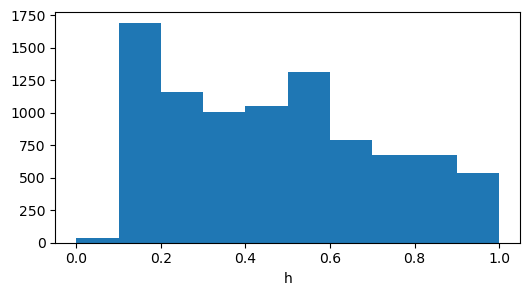

In [6]:
print('Range of evaluation measures:')
print('   Precision:', np.min(results['precision']), np.max(results['precision']))
print('   Fairness perception:', np.min(results['fairperception']), np.max(results['fairperception']))
print('   WSD:', np.max(results['wsd']), np.min(results['wsd']))
print('   WRD:', np.max(results['wrd']), np.min(results['wrd']))

h, bestparam, utils = best_FPRank(results, params)
out_df = pd.DataFrame({'h': h, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_FPRank.csv', index = False)
print('\nResult for FPRank:')
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for InFoRM

Require InFoRM package that can be downloaded from https://github.com/jiank2/inform

In [7]:
from InFoRM import utils
from InFoRM.method.debias_model import DebiasModel
from scipy.sparse import csc_matrix

def debias_mining_model(adj, s, alpha=0., metric='cosine'):
    # init params
    c = 0.85

    sp_adj = csc_matrix(adj)
    adj = utils.symmetric_normalize(sp_adj)
    
    # build similarity matrix
    sim = utils.filter_similarity_matrix(utils.get_similarity_matrix(adj, metric=metric), sigma=0.75)
    sim = utils.symmetric_normalize(sim)

    # debias pagerank
    FairModel = DebiasModel()
    
    personalization = s.reshape(-1,1)
    personalization = personalization/personalization.sum()
    
    r = FairModel.pagerank(adj, sim, alpha, c=c, personalization=personalization)
    r = np.array([list(r.values())])
    r = csc_matrix(np.array(r).transpose())

    return r


  prec: 0.409714 |  Rank corr: 0.566566  | fp: 0.431478 | wsd: 0.000000 | wrd: 0.000107


{'precision': 0.40971366094174466,
 'corr': 0.5665662505053958,
 'fairperception': 0.4314777554214174,
 'wsd': 2.946858086378284e-12,
 'wrd': 0.00010681365605431302}

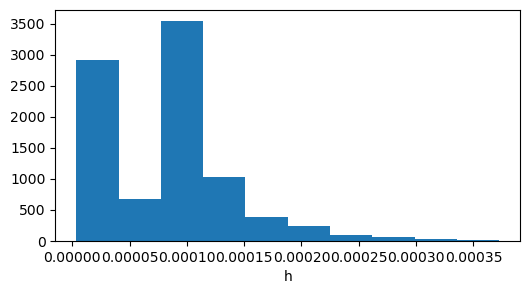

In [8]:
h = debias_mining_model(adj, s).toarray().flatten()
out_df = pd.DataFrame({'h': h, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_INFORM.csv', index = False)
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for FSPR

     pcost       dcost       gap    pres   dres
 0: -8.0138e+01 -1.0015e+04  4e+04  2e+00  6e-15
 1: -1.6841e+01 -3.0108e+03  4e+03  4e-02  2e-15
 2: -1.2226e+00 -4.6320e+01  5e+01  6e-04  3e-15
 3: -1.0678e+00 -2.6613e+00  2e+00  6e-06  3e-15
 4: -1.0855e+00 -1.4940e+00  4e-01  1e-06  2e-15
 5: -1.1755e+00 -1.5674e+00  4e-01  9e-07  2e-15
 6: -1.2318e+00 -1.3932e+00  2e-01  3e-07  1e-15
 7: -1.2457e+00 -1.4068e+00  2e-01  3e-07  1e-15
 8: -1.2929e+00 -1.3268e+00  3e-02  5e-08  1e-15
 9: -1.3018e+00 -1.3168e+00  2e-02  2e-09  1e-15
10: -1.3088e+00 -1.3091e+00  4e-04  3e-11  1e-15
11: -1.3089e+00 -1.3089e+00  6e-06  4e-13  3e-15
12: -1.3089e+00 -1.3089e+00  2e-07  7e-15  6e-15
Optimal solution found.

  prec: 0.464762 |  Rank corr: 0.709476  | fp: 0.473508 | wsd: 0.000007 | wrd: 0.000943


{'precision': 0.4647619398088383,
 'corr': 0.7094759990444518,
 'fairperception': 0.47350771294433264,
 'wsd': 7.29655948846492e-06,
 'wrd': 0.0009427684843131462}

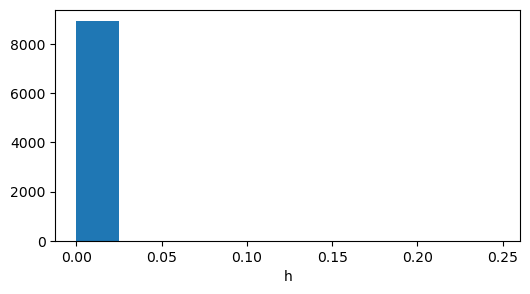

In [9]:
h = FSPR_model(adj, s, prt)
out_df = pd.DataFrame({'h': h.ravel(), prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_FSPR.csv', index = False)
evaluate(h.ravel(), y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for FairTopk

Require fairsearchcore library from https://github.com/fair-search/fairsearch-fair-python

D:\Anaconda\envs\fprank\lib\site-packages\fairsearchcore\fair.py:165: UserWarning: Library has not been tested with values outside this range
  warnings.warn("Library has not been tested with values outside this range")


Result for FairTopK:

  prec: 0.391845 |  Rank corr: 0.532261  | fp: 0.418064 | wsd: 0.059605 | wrd: 0.016867


{'precision': 0.39184462005157655,
 'corr': 0.5322614129857908,
 'fairperception': 0.41806393919069973,
 'wsd': 0.059604605248198196,
 'wrd': 0.016866770704269958}

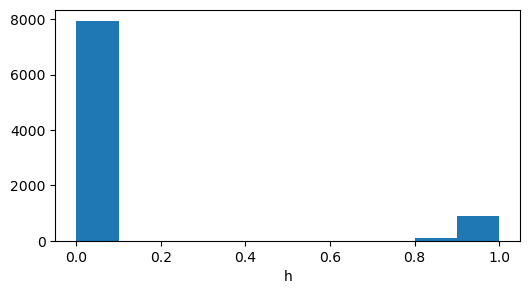

In [10]:
from codes.data_loader import load_data_fairtopk

rankings, k, p, data = load_data_fairtopk(filename, class_attr, score_attr, prt_attr, factor=10)

alpha = 0.1
fair = fsc.Fair(1000, p, alpha)
re_ranked = fair.re_rank(rankings)
eps = 1/len(rankings)
h = np.zeros(len(rankings))
for i,item in enumerate(re_ranked):
    h[item.id] = 1 - i*eps
out_df = pd.DataFrame({'h': h, prt_attr : data[prt_attr]})
out_df.to_csv(output_file + '_FairTopk.csv', index = False)

print('Result for FairTopK:')
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)
